In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
#import datasets
races = pd.read_csv("data_raw/races.csv")
pit_stops = pd.read_csv("data_raw/pit_stops.csv")

#find data types
display(pit_stops.dtypes)
display(races.dtypes)

#convert durations from string to numeric
pit_stops['duration_sec'] = pd.to_numeric(pit_stops['duration'], errors='coerce')

#find description of pit_stops dataset (standard deviation, minimum, maximum, count)
pit_stops_agg = pit_stops.agg(mean_duration = ('duration_sec','mean'),
                          sd_duration =   ('duration_sec','std'),
                          min_duration =  ('duration_sec','min'),
                          max_duration =  ('duration_sec','max'),
                          count_duration   = ('duration_sec',len))

display(pit_stops_agg)

#find unique values for datasets
print("number of unique years:", len(pd.unique(races["year"])))
print("number of unique race IDs:", len(pd.unique(races["raceId"])))





raceId           int64
driverId         int64
stop             int64
lap              int64
time            object
duration        object
milliseconds     int64
dtype: object

raceId          int64
year            int64
round           int64
circuitId       int64
name           object
date           object
time           object
url            object
fp1_date       object
fp1_time       object
fp2_date       object
fp2_time       object
fp3_date       object
fp3_time       object
quali_date     object
quali_time     object
sprint_date    object
sprint_time    object
dtype: object

,duration_sec
mean_duration,24.398479
sd_duration,4.571351
min_duration,12.897000
max_duration,59.555000
count_duration,9634.000000


number of unique years: 74
number of unique race IDs: 1102


In [ ]:
#merge datasets pit_stops and races
pit_stops_merge = pd.merge(pit_stops,
                         races[["raceId","year", "date"]],
                         on = "raceId",
                         how = "left")

#sort merged dataset by increasing years
pit_stops_merge.sort_values("year",ascending = True)

display(pit_stops_merge.dtypes)

#convert data column from string to date
pit_stops_merge['date_dt'] = pd.to_datetime(pit_stops_merge["date"], format = "%Y-%m-%d")

#aggregate merged dataset to obtain mean and standard deviation of duration
year_agg = (pit_stops_merge.groupby("year")
                      .agg(mean_duration =   ('duration_sec','mean'),
                           std_duration = ('duration_sec','std')))

display(year_agg)



raceId            int64
driverId          int64
stop              int64
lap               int64
time             object
duration         object
milliseconds      int64
duration_sec    float64
year              int64
date             object
dtype: object

,mean_duration,std_duration
year,,
2011,23.568104,4.301400
2012,23.283770,4.256049
2013,23.560905,3.731595
2014,24.962164,3.670352
2015,25.273400,4.884303
2016,24.641467,4.431461
2017,24.239159,4.972287
2018,24.674284,4.378493
2019,24.870613,4.492829


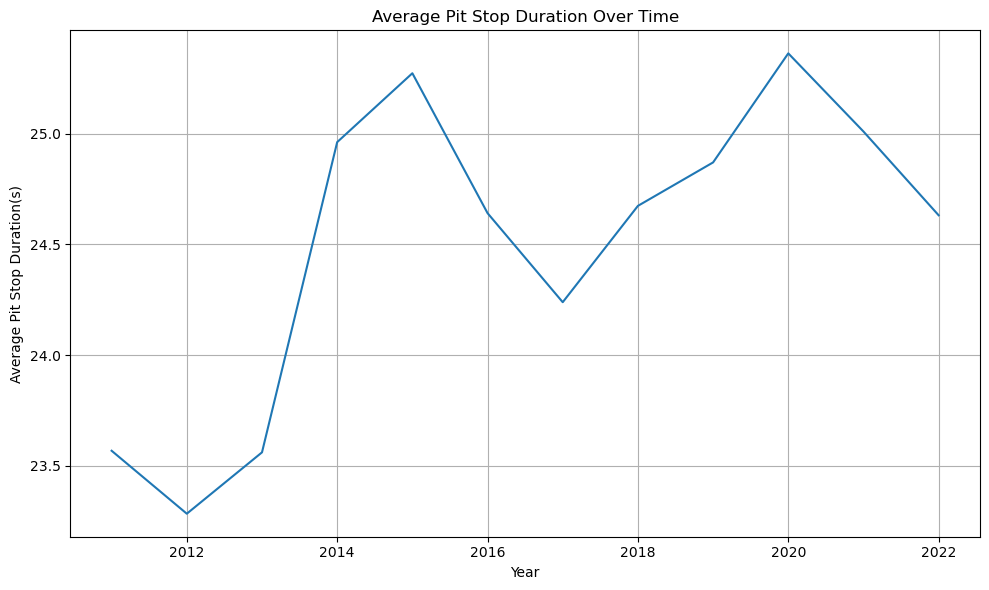

In [ ]:
#produce line plot of pit stop duration over time (can later change font size, color, etc.)
year_agg = year_agg.reset_index()
plt.figure(figsize=(10, 6))
plt.plot(year_agg['year'], year_agg['mean_duration'])
plt.xlabel('Year')
plt.ylabel('Average Pit Stop Duration(s)')
plt.title('Average Pit Stop Duration Over Time')
plt.grid(True)
plt.tight_layout()
plt.show()




/var/folders/v3/_b_dy1_538jgff8xrk3wxbxr0000gn/T/ipykernel_47988/4207678199.py:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  year_config = pd.Grouper(key='date_dt', freq='Y')


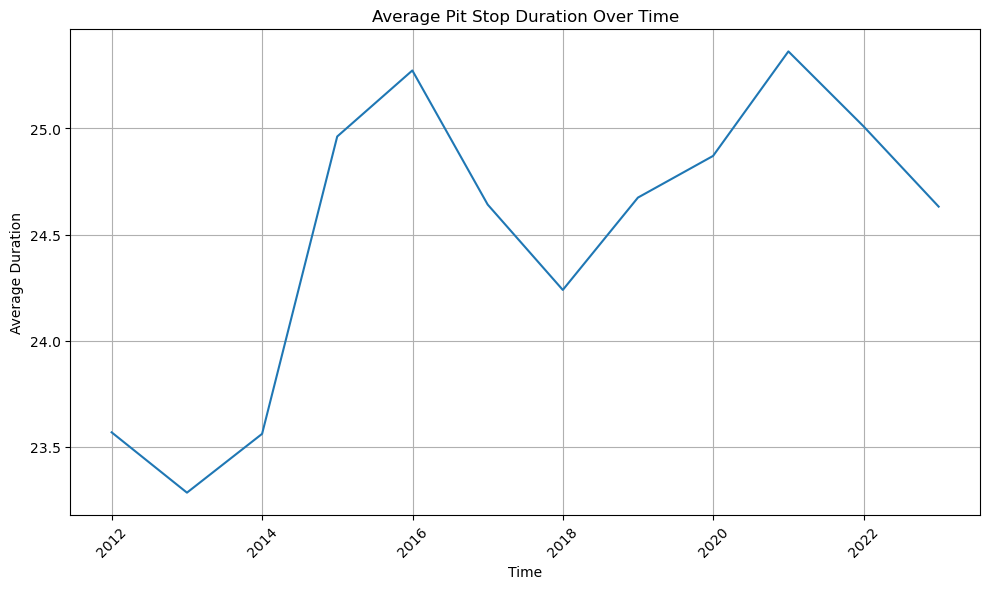

In [ ]:
#same plot but produced a different way using pd.Grouper 
#will only use one plot in the final project, this might be better because it uses more functions we learnt
year_config = pd.Grouper(key='date_dt', freq='Y')
yearlyduration = (pit_stops_merge
                   .groupby(year_config)
                   .agg(duration_mean=("duration_sec", "mean"))
                   .reset_index()
                   .sort_values("date_dt"))

plt.figure(figsize=(10, 6))
plt.plot("date_dt", "duration_mean", data=yearlyduration)
plt.xlabel("Time")
plt.ylabel("Average Duration")
plt.title("Average Pit Stop Duration Over Time")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Change in Pit Stop Duration')

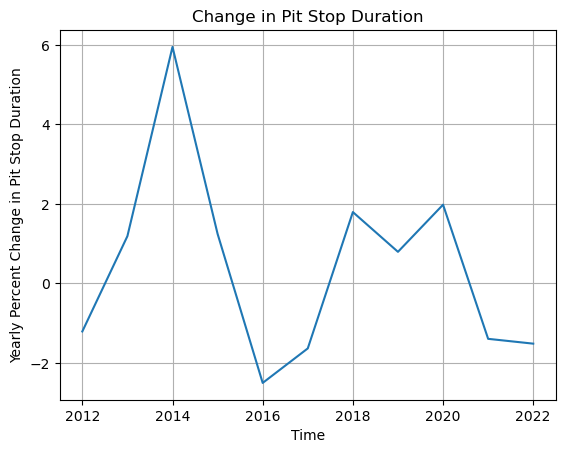

In [ ]:
#computing percentage change in pit stop duration using method learnt in class
#percentage change each year
year_agg["diff_duration"] = year_agg["mean_duration"].diff()
year_agg["lag_duration"] = year_agg["mean_duration"].shift(1)
year_agg["change_duration"] = (year_agg["diff_duration"]/year_agg["lag_duration"])* 100

plt.plot("year", "change_duration",
          data = year_agg)
plt.xlabel("Time")
plt.ylabel("Yearly Percent Change in Pit Stop Duration")
plt.grid(True)
plt.title("Change in Pit Stop Duration")

/var/folders/v3/_b_dy1_538jgff8xrk3wxbxr0000gn/T/ipykernel_47988/3047119181.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_config = pd.Grouper(key='date_dt', freq='M')


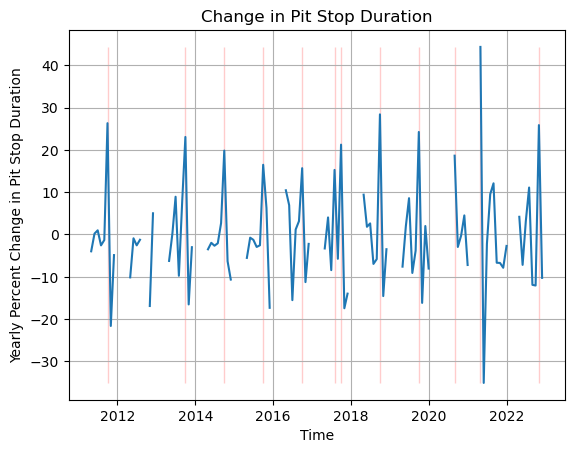

In [97]:
#same as above but percentage change each month
month_config = pd.Grouper(key='date_dt', freq='M')
monthlyduration = (pit_stops_merge
                   .groupby(month_config)
                   .agg(duration_mean=("duration_sec", "mean"))
                   .reset_index()
                   .sort_values("date_dt"))

monthlyduration["diff_duration"] = monthlyduration["duration_mean"].diff()
monthlyduration["lag_duration"] = monthlyduration["duration_mean"].shift(1)
monthlyduration["change_duration"] = (monthlyduration["diff_duration"]/monthlyduration["lag_duration"])* 100

monthlyduration["bool"] = monthlyduration["change_duration"] > 15

plt.plot("date_dt", "change_duration",
          data = monthlyduration)
plt.xlabel("Time")
plt.ylabel("Yearly Percent Change in Pit Stop Duration")
plt.grid(True)
plt.title("Change in Pit Stop Duration")

#highlight time points with a more significant increase in pit stop duration
#this links to the question on pit stop time over seasons
#I will aim to fix the gaps where there is no data
vec_y = monthlyduration["change_duration"]
plt.fill_between(x= monthlyduration["date_dt"],
                 y1 = vec_y.min(),
                 y2 = vec_y.max(),
                 where = monthlyduration["bool"],
                 alpha = 0.2,color = "red")
#almost every year with data shows a significant increase in pit stop duration during September


In [ ]:
#displaying data on the month of September, where sharp increases are observed
sept = pit_stops_merge[pit_stops_merge['date_dt'].dt.month == 9]
print(sept.sort_values('duration_sec', ascending=False).head(10))

      raceId  driverId  stop  lap      time duration  milliseconds  \
7172    1022       832     1    1  15:16:37   59.291         59291   
9371    1088       852     3   43  16:01:22   52.684         52684   
1709     871         5     1   14  14:35:49   52.206         52206   
6056     982       828     5   27  21:07:36   50.617         50617   
6021     982       836     2    2  20:10:14   45.875         45875   
783      854       817     1    1  20:06:48   44.170         44170   
1790     873        37     3   40  21:27:06   44.101         44101   
7242    1024       154     2   35  21:18:29   43.576         43576   
8546    1066       840     2   48  16:26:01   43.124         43124   
849      854        24     4   46  21:41:47   42.920         42920   

      duration_sec  year        date    date_dt  diff_duration  lag_duration  \
7172        59.291  2019  2019-09-01 2019-09-01         20.245        39.046   
9371        52.684  2022  2022-09-04 2022-09-04         33.600       

Reasons for sharp increase in September: 

1. Certain races take place at each time of year, Italy and Singapore races often take place in September.
Monza (Italy GP) – known for very fast laps, but long pit lane (adds total time).
Singapore GP – a huge factor: it's a street circuit with:
    Tight pit lane entry/exit
    Hot/humid conditions
    Night race with higher chance of Safety Cars, which can mess up strategy and increase stop durations.
Singapore can skew the average heavily due to its unique characteristics.

2. September is late in the racing season, pit strategies change
More tactical tire management due to championship battles.
Heavier traffic in pits during Safety Cars or VSCs.
Double-stacking pit stops (when both teammates pit on the same lap), which increases wait times.

Rules changes:
For example, in 2021, new rules were enforced in September to slow down pit stops to improve safety—directly causing a spike.